In [1]:
# reload modules before executing user code
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!ls dataset/

sample_submission_v2.csv  test_v2  train_ship_segmentations_v2.csv  train_v2


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from sklearn.model_selection import StratifiedKFold
from utils import display_trnImg

In [5]:
img_tst = os.listdir('dataset/test_v2/')
img_trn = os.listdir('dataset/train_v2/')
df_tst = pd.read_csv('dataset/sample_submission_v2.csv')
df_trn = pd.read_csv('dataset/train_ship_segmentations_v2.csv')

In [6]:
df_trn.EncodedPixels[999]

'68791 1 69558 4 70326 5 71093 7 71860 10 72628 11 73395 11 74162 12 74930 11 75697 11 76464 12 77231 12 77999 11 78766 12 79533 12 80301 11 81068 11 81837 10 82607 7 83376 5 84145 4 84915 1'

## split fold

In [25]:
df_trn['numBox'] = df_trn.EncodedPixels.map(lambda x: x is not np.nan).astype(np.int)
df_trn.head()

,ImageId,EncodedPixels,numBox
0,00003e153.jpg,NaN,0
1,0001124c7.jpg,NaN,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1


In [26]:
df_trn.query('ImageId=="000194a2d.jpg"')['EncodedPixels']

3    360486 1 361252 4 362019 5 362785 8 363552 10 ...
4    51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5    198320 10 199088 10 199856 10 200624 10 201392...
6    55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7    254389 9 255157 17 255925 17 256693 17 257461 ...
Name: EncodedPixels, dtype: object

In [29]:
df_trn.query('ImageId=="000194a2d.jpg"')['EncodedPixels'].tolist()

['360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1',
 '51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9',
 '198320 10 199088 10 199856 10 200624 10 201392 10 202160 10 202928 10 203696 10 204464 10 205232 10 206000 10 206768 10 207536 10 208304 10 209072 10 209840 10 210608 10 211376 10 212144 10 212912 10 213680 10 214448 10 215216 10 215984 10 216751 10 217519 10 218287 10 219055 10 219823 10 220591 10 221359 10 222127 10 222895 10 223663 10 224431 10 225199 10 225967 10 226735 10 227503 10 228271 10 229039 10 229807 10 230575 10 231343 10 232111 10 232879 10 233647 10 234415 10',
 '55683 1 56451 1 57219 1 57987 1 58755 1 59523 1 60291 1',
 '254389 9 255157 17 255925 17 256693 17 257461 17 258229 17 258997 17 259765 17 260533 17

In [37]:
df_trn['EncodedPixels'].fillna('')

0                                                          
1                                                          
2         264661 17 265429 33 266197 33 266965 33 267733...
3         360486 1 361252 4 362019 5 362785 8 363552 10 ...
4         51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5         198320 10 199088 10 199856 10 200624 10 201392...
6         55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7         254389 9 255157 17 255925 17 256693 17 257461 ...
8                                                          
9         108287 1 109054 3 109821 4 110588 5 111356 5 1...
10        101361 1 102128 3 102896 4 103663 6 104430 9 1...
11        74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...
12        74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...
13        150423 2 151190 3 151958 3 152726 4 153495 3 1...
14        139644 2 140408 6 141174 9 141942 9 142711 6 1...
15        75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...
16        86727 2 87493 4 88261 4 89030 

In [34]:
df_trn.query('ImageId=="00003e153.jpg"')['EncodedPixels'].tolist()[0] is np.nan

True

In [7]:
val_count = df_trn.groupby('ImageId').numBox.sum()
val_count.head()

ImageId
00003e153.jpg    0
0001124c7.jpg    0
000155de5.jpg    1
000194a2d.jpg    5
0001b1832.jpg    0
Name: numBox, dtype: int64

In [8]:
val_count = pd.DataFrame(val_count)
val_count.reset_index(inplace=True)
val_count.head()

,ImageId,numBox
0,00003e153.jpg,0
1,0001124c7.jpg,0
2,000155de5.jpg,1
3,000194a2d.jpg,5
4,0001b1832.jpg,0


Text(0.5,1,'#ship per image distribution')

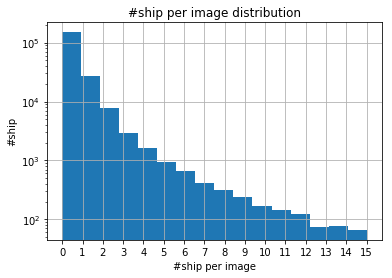

In [9]:
fig, axs = plt.subplots()
val_count.numBox.hist(ax=axs, bins=16)
axs.semilogy()
axs.set_xticks(range(16))
axs.set_xlabel('#ship per image')
axs.set_ylabel('#ship')
axs.set_title('#ship per image distribution')

In [10]:
val_count['foldIdx'] = np.nan

skf = StratifiedKFold(n_splits=5, random_state=42)
for i, (trnIdx, tstIdx) in enumerate(skf.split(val_count.ImageId.values, val_count.numBox.values)):
    val_count.iloc[tstIdx, 2] = i+1
    
val_count['foldIdx'] = val_count.foldIdx.astype(np.int)

In [11]:
val_count.foldIdx.dtype

dtype('int64')

In [12]:
val_count[['ImageId', 'foldIdx']].head()

,ImageId,foldIdx
0,00003e153.jpg,1
1,0001124c7.jpg,1
2,000155de5.jpg,1
3,000194a2d.jpg,1
4,0001b1832.jpg,1


In [13]:
df_trn = pd.merge(df_trn[['ImageId', 'EncodedPixels']], val_count[['ImageId', 'foldIdx']], on='ImageId')
df_trn.columns = ['ImageId', 'EncodedPixels', 'foldIdx']
df_trn.head()

,ImageId,EncodedPixels,foldIdx
0,00003e153.jpg,NaN,1
1,0001124c7.jpg,NaN,1
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1


In [14]:
if not os.path.isdir('folds'):
    os.mkdir('folds')

for i in range(5):
    val = df_trn[df_trn.foldIdx == i+1]
    trn = df_trn[df_trn.foldIdx != i+1]
    val.to_csv('folds/cv5val{}.csv'.format(i+1) ,index=False, columns=['ImageId', 'EncodedPixels'])
    val.to_csv('folds/cv5trn{}.csv'.format(i+1) ,index=False, columns=['ImageId', 'EncodedPixels'])

## display

In [15]:
print('Number of images in Train dataset:')
print(len(img_trn))

print('Number of imges in Test dataset:')
print(len(img_tst))

Number of images in Train dataset:
192556
Number of imges in Test dataset:
15606


              ImageId                                      EncodedPixels  \
127579  8ccf7611e.jpg  214209 5 214977 10 215745 10 216512 11 217280 ...   
127580  8ccf7611e.jpg  355910 4 356678 5 357446 5 358214 5 358981 5 3...   
127581  8ccf7611e.jpg  360544 3 361312 7 362080 7 362847 8 363615 7 3...   
127582  8ccf7611e.jpg  278510 3 279278 7 280045 10 280813 10 281581 9...   
127583  8ccf7611e.jpg  192193 14 192961 14 193729 14 194497 14 195265...   
127584  8ccf7611e.jpg  466663 3 467431 7 468198 9 468966 9 469734 8 4...   
127585  8ccf7611e.jpg  50435 2 51203 6 51971 10 52738 13 53506 13 542...   
127586  8ccf7611e.jpg  103633 4 104401 10 105169 16 105937 22 106704 ...   
127587  8ccf7611e.jpg  352858 4 353626 8 354394 8 355162 8 355930 7 3...   
127588  8ccf7611e.jpg  341327 4 342095 10 342863 14 343630 15 344398 ...   
127589  8ccf7611e.jpg  463601 2 464369 6 465136 10 465904 12 466672 1...   
127590  8ccf7611e.jpg  480502 2 481270 4 482038 6 482805 7 483573 7 4...   
127591  8ccf

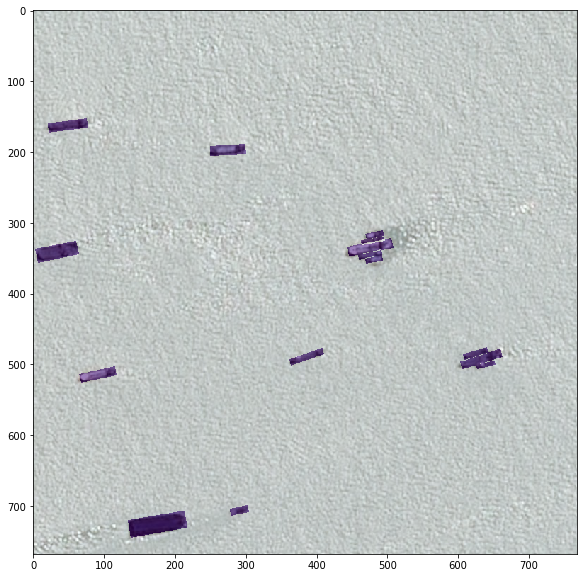

In [16]:
display_trnImg('8ccf7611e.jpg', df_trn)

In [10]:
from mrcnn.config import Config

In [11]:
# set color for class
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

In [13]:
class DetectorConfig(Config):    
    # Give the configuration a recognizable name  
    NAME = 'airbus'
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 9
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 2  # background and ship classes
    
    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384
    RPN_ANCHOR_SCALES = (8, 16, 32, 64)
    TRAIN_ROIS_PER_IMAGE = 64
    MAX_GT_INSTANCES = 14
    DETECTION_MAX_INSTANCES = 10
    DETECTION_MIN_CONFIDENCE = 0.95
    DETECTION_NMS_THRESHOLD = 0.0

    STEPS_PER_EPOCH = 150
    VALIDATION_STEPS = 125
    
    ## balance out losses
    LOSS_WEIGHTS = {
        "rpn_class_loss": 20.0,
        "rpn_bbox_loss": 0.8,
        "mrcnn_class_loss": 6.0,
        "mrcnn_bbox_loss": 1.0,
        "mrcnn_mask_loss": 1.2
    }
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

In [14]:
from mrcnn import model as modellib

In [16]:
model_path = 'logs/resnet50/fold2/mask_rcnn_airbus_0022.h5'
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir='logs/resnet50/fold2')

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Loading weights from  logs/resnet50/fold2/mask_rcnn_airbus_0022.h5


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory